In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Life Expectancy.csv")

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Check for missing values
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Checking for nan or null values.
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#As we have not much data instead of .dropna() let's fill them with the mean
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

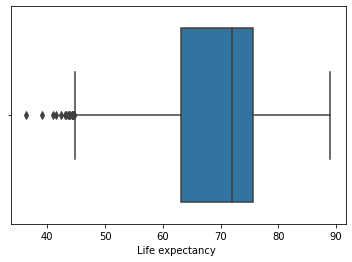

In [ ]:
 # Removing outliers
# detecting outliers - target value
# boxplot
sns.boxplot(data=df, x = "Life expectancy ")
plt.show()

In [ ]:
df[df['Life expectancy ']<45]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,80.940461,0,44.2,58,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.000000,0,27.4,6,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
1485,Lesotho,2004,Developing,44.8,666.0,5,1.80,67.913618,6.000000,31,26.9,7,89.0,6.96,9.0,34.6,781.514594,1933728.0,9.7,9.7,0.439,10.7
1582,Malawi,2003,Developing,44.6,613.0,43,1.08,4.375316,84.000000,167,15.2,70,85.0,6.35,84.0,24.2,26.152517,12336687.0,7.6,7.5,0.362,10.3
1583,Malawi,2002,Developing,44.0,67.0,46,1.10,3.885395,64.000000,92,14.8,75,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1584,Malawi,2001,Developing,43.5,599.0,48,1.15,12.797606,80.940461,150,14.4,80,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1585,Malawi,2000,Developing,43.1,588.0,51,1.18,13.762702,80.940461,304,14.1,84,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,7.9,0.391,10.7
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,80.940461,33,19.7,46,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,2005,Developing,43.3,48.0,30,3.83,42.088929,80.940461,29,19.2,47,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2308,Sierra Leone,2004,Developing,42.3,496.0,30,3.99,38.524548,80.940461,7,18.8,47,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6


In [ ]:
len(df[df['Life expectancy ']<45])

19

In [ ]:
#Removing outliers
df.drop([1127,1484,1485,1582,1583,1584,1585,2307,2308,2309,2311,2312,2920,2921,2932,2933,2934,2935],inplace=True)

In [ ]:
#Handling categorical data
# Seperate categorical and numerical columns
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64", 'int64'])

In [ ]:
df_num.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df_cat.head()


,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


In [ ]:
df_cat['Status'].value_counts()

Developing    2408
Developed      512
Name: Status, dtype: int64

In [ ]:
data = pd.get_dummies(df_cat['Status'])
data.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df_cat['Country'].value_counts()

Jamaica                                                 16
Cuba                                                    16
United Kingdom of Great Britain and Northern Ireland    16
Bangladesh                                              16
Liberia                                                 16
                                                        ..
Niue                                                     1
Palau                                                    1
Cook Islands                                             1
Tuvalu                                                   1
Dominica                                                 1
Name: Country, Length: 193, dtype: int64

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_cat['Country'])
print(le.classes_)
dt= le.transform(df_cat['Country'])
dt
                 

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

array([  0,   0,   0, ..., 192, 192, 192])

In [ ]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
print(df_cat.head())

   Country  Status
0        0       1
1        0       1
2        0       1
3        0       1
4        0       1


In [ ]:
# merge data frames to make it complete
new_df = pd.concat([df_num, df_cat], axis=1)
new_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country,Status
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2008,48.2,632.0,30,3.56,20.843429,75.0,0,28.6,46,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7,192,1
2930,2007,46.6,67.0,29,3.88,29.814566,72.0,242,28.2,46,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6,192,1
2931,2006,45.4,7.0,28,4.57,34.262169,68.0,212,27.9,45,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5,192,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,192,1


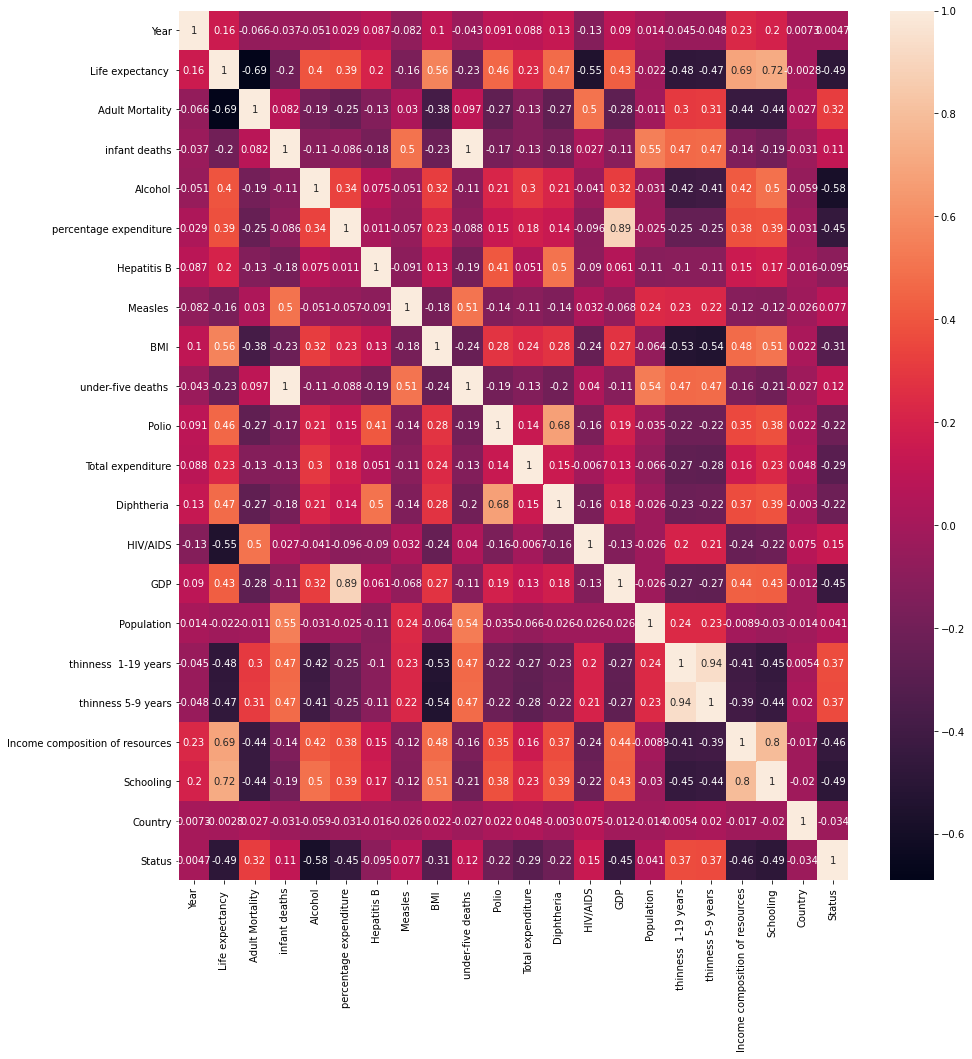

In [ ]:
#Checking correaltion using heatmap
plt.figure(figsize=(15,16))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

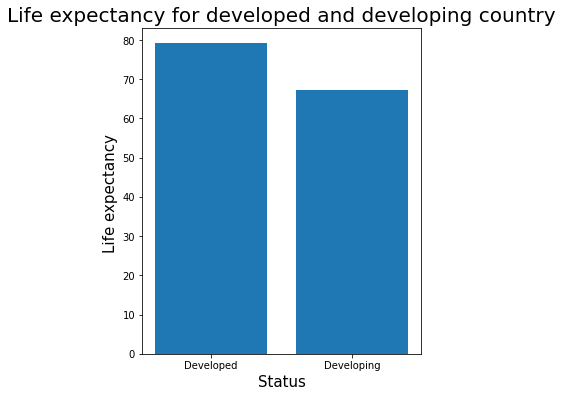

In [ ]:
#Visualisation 
# 1.Life expectancy for developed and developing country
plt.figure(figsize=(5,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life expectancy '].mean())
plt.xlabel("Status",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy for developed and developing country",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Life expectancy  - Schooling')

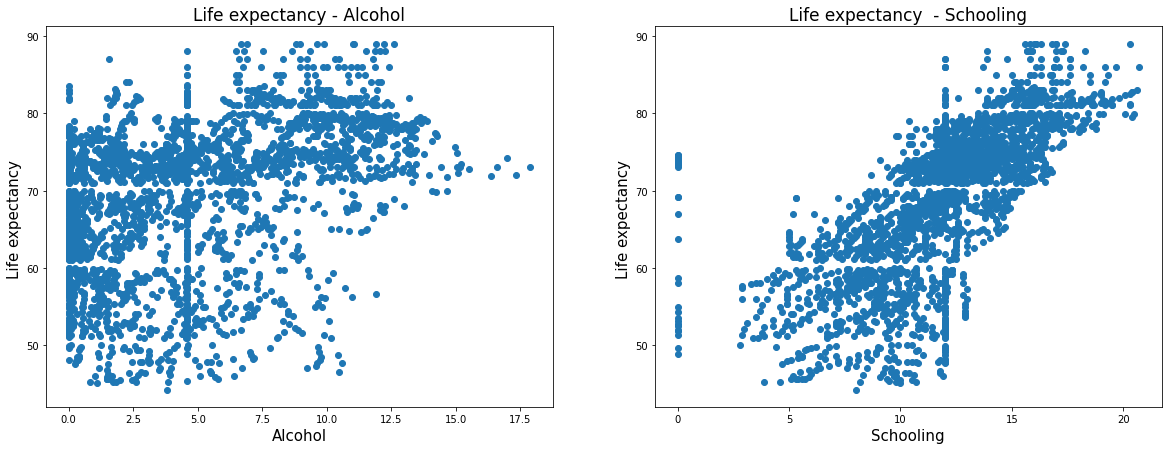

In [ ]:
#2.Effect of Alcohol and Scholing on life expectancy
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.scatter(df["Alcohol"], df["Life expectancy "])
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy - Alcohol",fontsize=17)

plt.subplot(1, 2, 2)
plt.scatter(df["Schooling"], df["Life expectancy "])
plt.xlabel("Schooling",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy  - Schooling",fontsize=17)

In [ ]:
# Model Creation
x = new_df.drop("Life expectancy ",axis=1)
y = new_df["Life expectancy "]

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#training  and fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = lr.predict(x_train)
print("Bias = ", r2_score(y_train, y_hat))

Bias =  0.8159617836575819


In [ ]:
y_hat = lr.predict(x_test)
print("Variance = ", r2_score(y_test, y_hat))

Variance =  0.827037757121033


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = new_df.drop(['Life expectancy '],axis=1)
y = new_df['Life expectancy ']
pf = PolynomialFeatures(2)
x_degree_2 = pf.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_degree_2, y, 
                                                    test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print(lr.score(x_test, y_test))

0.8642880073386806


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_hat = dt.predict(x_test)
print("R2 = ", r2_score(y_test, y_hat))

R2 =  0.9111402378159066
